In [40]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from logger import Logger
from collector import Collector
from enricher import Enricher

In [41]:
# Inicialización de clases
logger = Logger()
df = pd.DataFrame()
logger.info('Main','main','Inicializar clase Logger')
collector = Collector(logger=logger)
enricher = Enricher(logger=logger)

In [42]:
# Obtener datos
df_1 = collector.collector_data()
df_2 = enricher.calcular_kpi(df_1)
df_2

c:\Users\PC\Documents\Proyecto Integrador V\PIV_2025-1\src\piv\collector.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')


,fecha,apertura,alto,bajo,cerrar,cierre_ajustado,volumen,dia,mes,año,year_month,retorno_diario,tasa_variacion_ac,retorno_acumulado,media_movil_5d,volatilidad
249,2024-05-24,467.62,479.85,466.30,478.22,476.48,12012300,24,Mayo,2024,2024-05,0.000000,0.022668,0.000000,0.000,0.000000
248,2024-05-28,476.58,480.86,474.84,479.92,478.18,10175800,28,Mayo,2024,2024-05,0.003555,0.007008,0.003555,0.000,0.000000
247,2024-05-29,474.66,479.85,473.70,474.36,472.64,9226200,29,Mayo,2024,2024-05,-0.011585,-0.000632,-0.008072,0.000,0.000000
246,2024-05-30,471.67,471.73,464.71,467.05,465.35,10735200,30,Mayo,2024,2024-05,-0.015410,-0.009795,-0.023357,0.000,0.000000
245,2024-05-31,465.80,469.12,454.46,466.83,465.13,16919800,31,Mayo,2024,2024-05,-0.000471,0.002211,-0.023817,473.276,6.125253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-05-19,628.25,643.00,627.80,640.43,640.43,9592400,19,Mayo,2025,2025-05,0.000141,0.019387,0.339195,648.008,9.034449
3,2025-05-20,636.01,639.35,632.26,637.10,637.10,6743500,20,Mayo,2025,2025-05,-0.005200,0.001714,0.332232,644.222,8.795568
2,2025-05-21,631.79,646.61,630.17,635.50,635.50,11464600,21,Mayo,2025,2025-05,-0.002511,0.005872,0.328886,639.450,3.259693
1,2025-05-22,634.05,643.25,630.71,636.57,636.57,8228400,22,Mayo,2025,2025-05,0.001684,0.003974,0.331124,637.988,2.263000


In [43]:
df_2 = enricher.calcular_kpi(df_1)
df_2.head()

,fecha,apertura,alto,bajo,cerrar,cierre_ajustado,volumen,dia,mes,año,year_month,retorno_diario,tasa_variacion_ac,retorno_acumulado,media_movil_5d,volatilidad
249,2024-05-24,467.62,479.85,466.30,478.22,476.48,12012300,24,Mayo,2024,2024-05,0.000000,0.022668,0.000000,0.000,0.000000
248,2024-05-28,476.58,480.86,474.84,479.92,478.18,10175800,28,Mayo,2024,2024-05,0.003555,0.007008,0.003555,0.000,0.000000
247,2024-05-29,474.66,479.85,473.70,474.36,472.64,9226200,29,Mayo,2024,2024-05,-0.011585,-0.000632,-0.008072,0.000,0.000000
246,2024-05-30,471.67,471.73,464.71,467.05,465.35,10735200,30,Mayo,2024,2024-05,-0.015410,-0.009795,-0.023357,0.000,0.000000
245,2024-05-31,465.80,469.12,454.46,466.83,465.13,16919800,31,Mayo,2024,2024-05,-0.000471,0.002211,-0.023817,473.276,6.125253


In [44]:
df = df_2[["fecha", "cierre_ajustado"]]
df.set_index('fecha', inplace=True)
df.head()

,cierre_ajustado
fecha,
2024-05-24,476.48
2024-05-28,478.18
2024-05-29,472.64
2024-05-30,465.35
2024-05-31,465.13


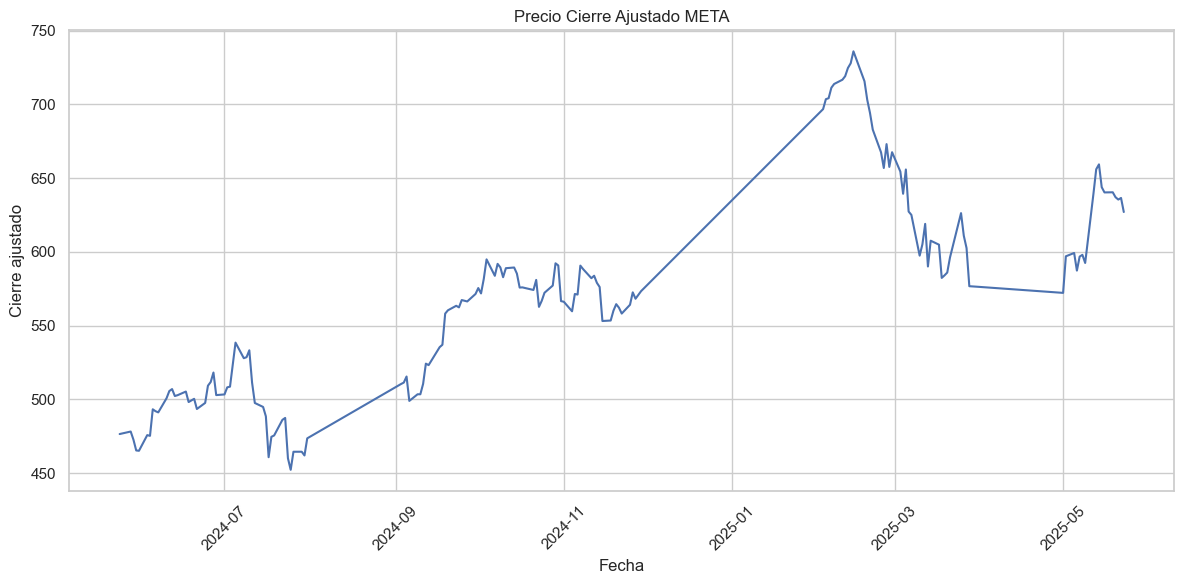

In [48]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(df.index, df['cierre_ajustado'], label='Cierre ajustado')
plt.title('Precio Cierre Ajustado META')
plt.xlabel('Fecha')
plt.ylabel('Cierre ajustado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

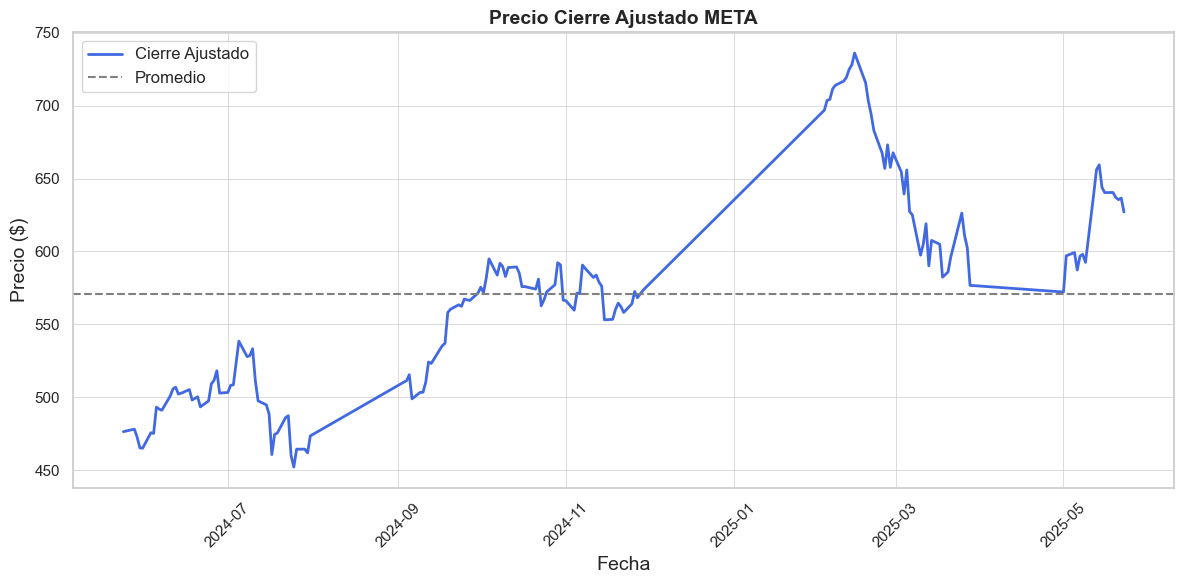

In [49]:
# Visualización con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['cierre_ajustado'], color='royalblue', linewidth=2, label='Cierre Ajustado')

plt.title('Precio Cierre Ajustado META', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)

plt.axhline(y=df['cierre_ajustado'].mean(), color='gray', linestyle='--', label='Promedio')

plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

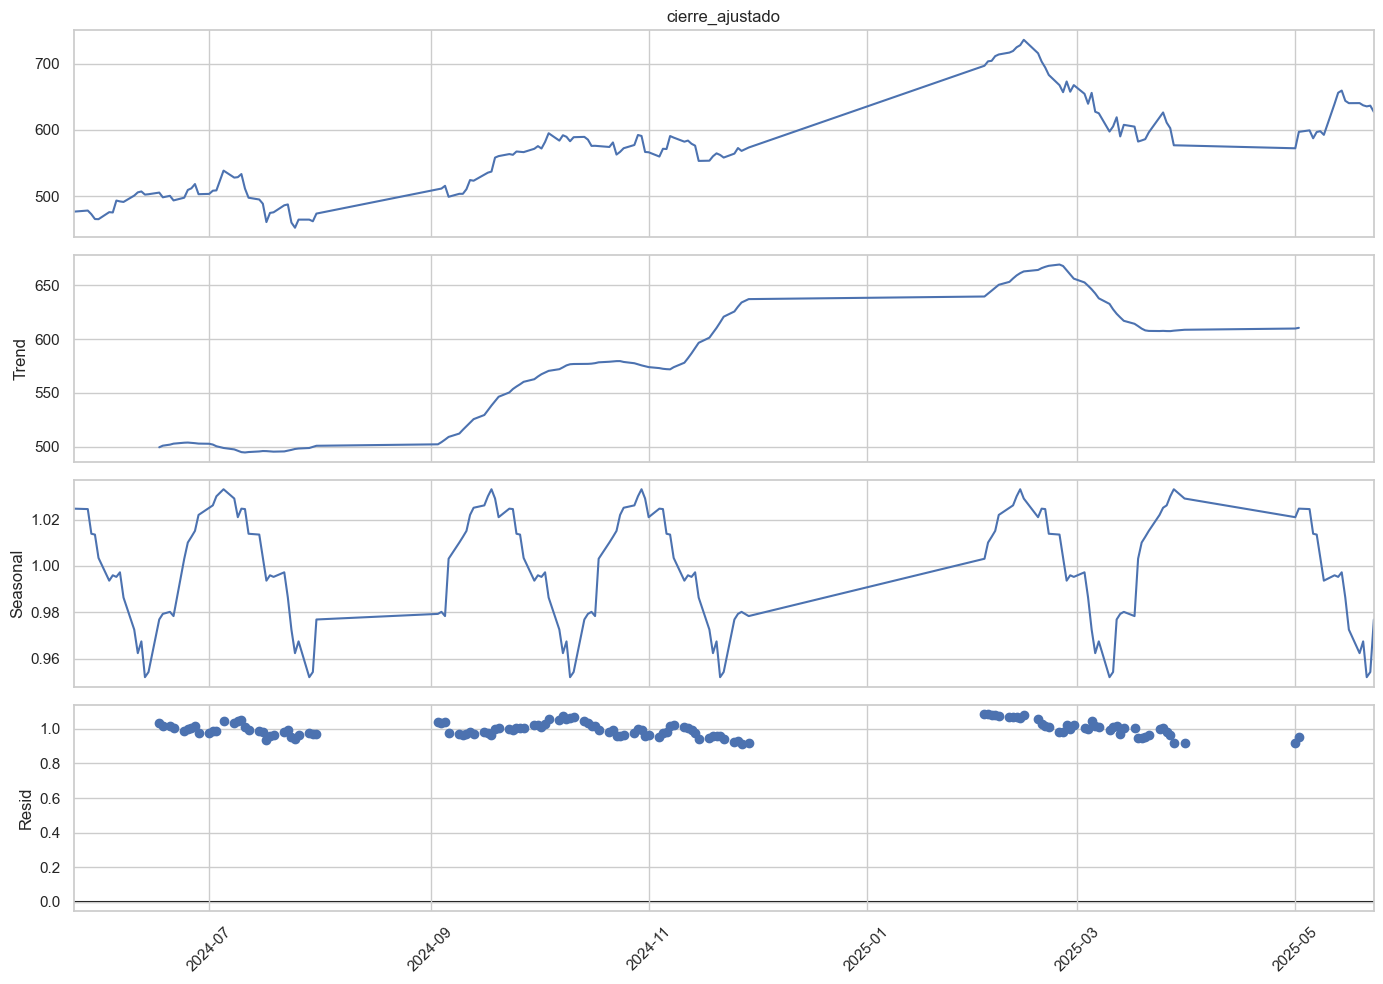

In [57]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(df['cierre_ajustado'], model='multiplicative', period=30)

# Graficar
fig = decomposition.plot()
fig.set_size_inches(14, 10)  # Tamaño más grande

for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Mostrar cada 2 meses
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato Año-Mes
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas

plt.tight_layout()
plt.show()

In [58]:
result = adfuller(df['cierre_ajustado'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f' {key}: {value}')

if result[1] > 0.05:
    print("\nLa serie NO es estacionaria (p-valor > 0.05)")
else:
    print("\nLa serie es estacionaria (p-valor <= 0.05)")


ADF Statistic: -1.6496711969530558
p-value: 0.4572119109641259
Critical Values:
 1%: -3.470616369591229
 5%: -2.8792214018977655
 10%: -2.57619681359045

La serie NO es estacionaria (p-valor > 0.05)


In [62]:
# Serie diferenciada
df_diff = df['cierre_ajustado'].diff().dropna()
df_diff

fecha
2024-05-28     1.70
2024-05-29    -5.54
2024-05-30    -7.29
2024-05-31    -0.22
2024-06-03    10.62
              ...  
2025-05-19     0.09
2025-05-20    -3.33
2025-05-21    -1.60
2025-05-22     1.07
2025-05-23    -9.51
Name: cierre_ajustado, Length: 165, dtype: float64

In [63]:
# Con la serie diferenciada
result_diff = adfuller(df_diff)
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f' {key}: {value}')

if result_diff[1] > 0.05:
    print("\nLa serie diferenciada NO es estacionaria")
else:
    print("\nLa serie diferenciada es estacionaria")

ADF Statistic: -12.377386082538017
p-value: 5.119183494300909e-23
Critical Values:
 1%: -3.47086589632514
 5%: -2.879330279087651
 10%: -2.57625492712671

La serie diferenciada es estacionaria


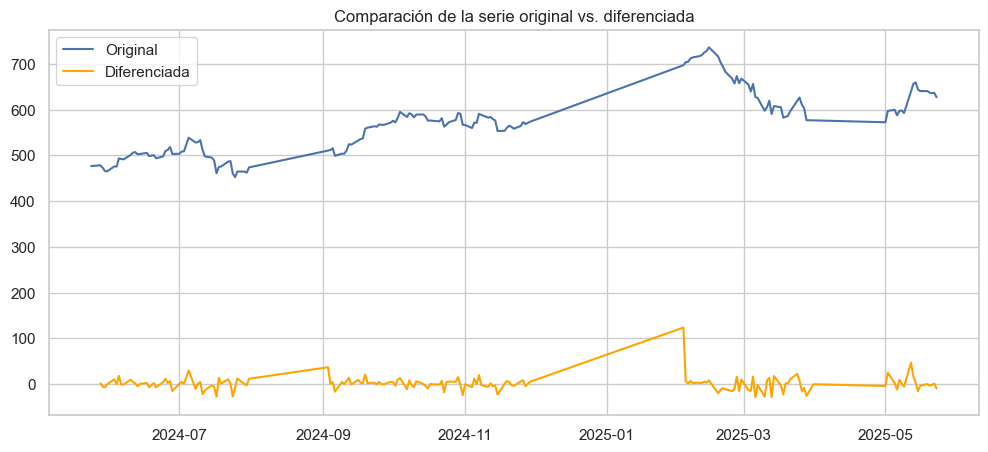

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(df['cierre_ajustado'], label='Original')
plt.plot(df_diff, label='Diferenciada', color='orange')
plt.title('Comparación de la serie original vs. diferenciada')
plt.legend()
plt.grid(True)
plt.show()

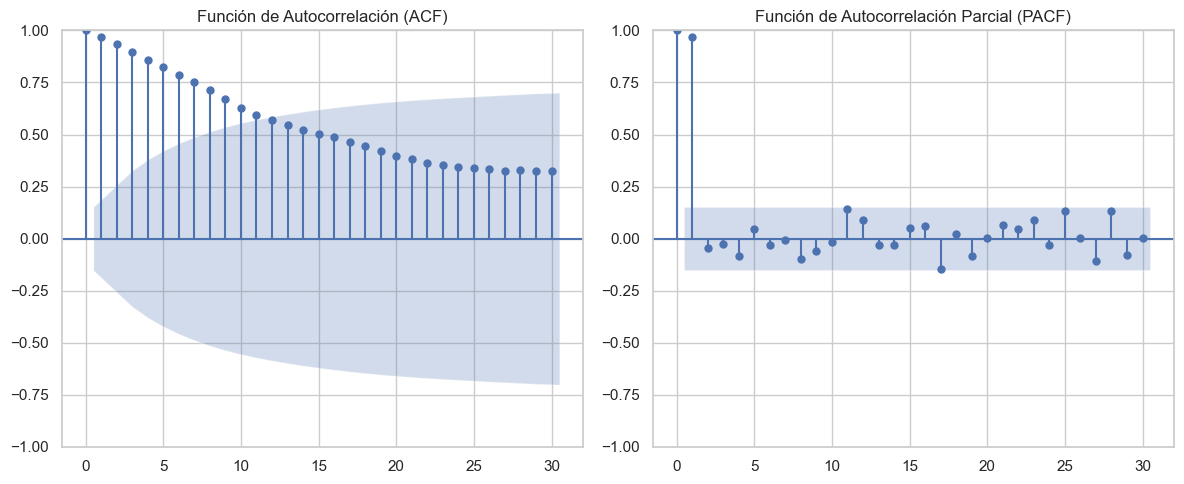

In [67]:
serie = df['cierre_ajustado']
plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie, lags=30, ax=plt.gca(), method='ywm')  # ywm = Yule-Walker-MLE
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

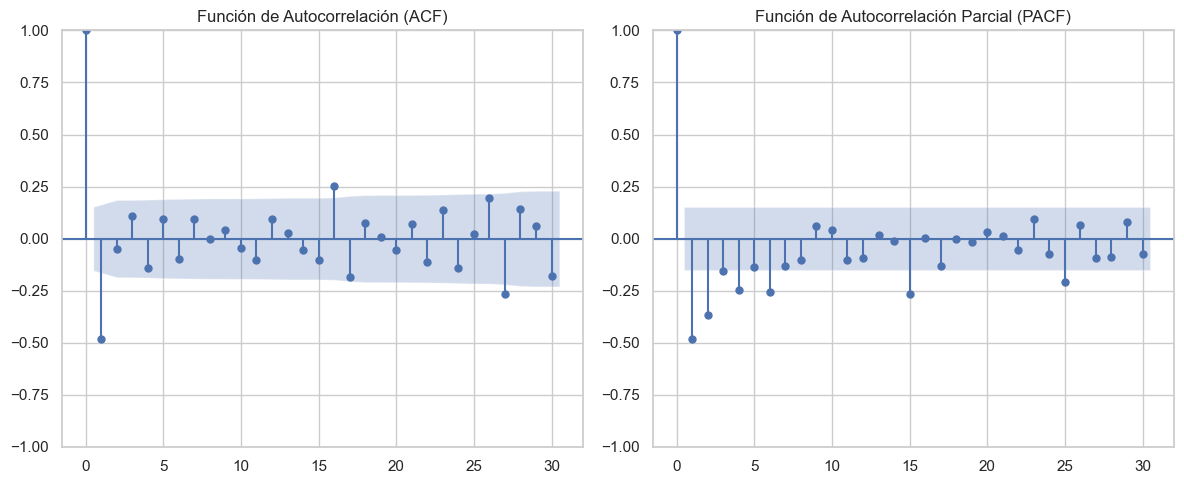

In [68]:
serie = df['cierre_ajustado']

plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df_diff2, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df_diff2, lags=30, ax=plt.gca(), method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8272\478368722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_12'] = df['cierre_ajustado'].rolling(window=12).mean()


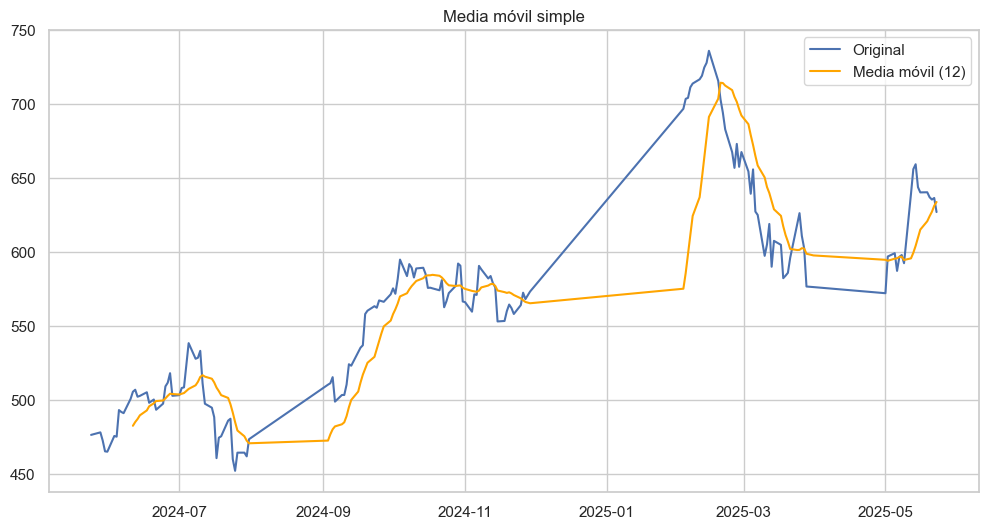

In [70]:
# Suavizado con media móvil simple (ej: ventana de 12 períodos)
df['MA_12'] = df['cierre_ajustado'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['cierre_ajustado'], label='Original')
plt.plot(df['MA_12'], label='Media móvil (12)', color='orange')
plt.title('Media móvil simple')
plt.legend()
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Temp\ipykernel_8272\2437909413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES'] = model_ses.fittedvalues


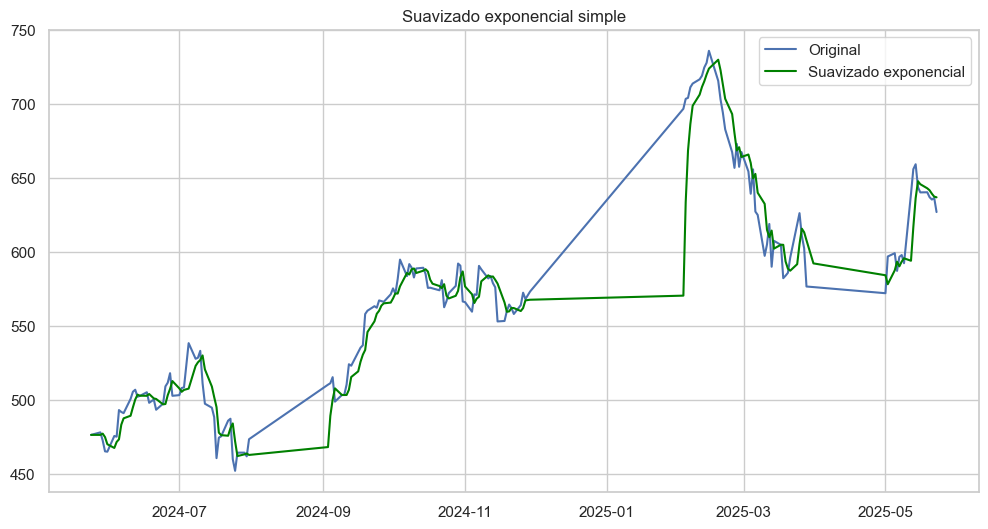

In [72]:
model_ses = SimpleExpSmoothing(df['cierre_ajustado']).fit(smoothing_level=0.5, optimized=False)
df['SES'] = model_ses.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['cierre_ajustado'], label='Original')
plt.plot(df['SES'], label='Suavizado exponencial', color='green')
plt.title('Suavizado exponencial simple')
plt.legend()
plt.show()